In [1]:
# Shashi Bhushan
# MSDS DSC 680, Spring 2024
# Project Milestone 2

In [2]:
# Importing libraries
import pandas as pd
import numpy as np

In [3]:
# Reading CSV File
df = pd.read_csv('Loan_Default.csv')
df.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [4]:
# Exploring data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [5]:
# finding percentage of missing values in each feature
for column in df.columns:
    print('{} has {} % missing values'.format(column,np.round(df[column].isnull().sum()/len(df)*100,4)))

ID has 0.0 % missing values
year has 0.0 % missing values
loan_limit has 2.2493 % missing values
Gender has 0.0 % missing values
approv_in_adv has 0.6107 % missing values
loan_type has 0.0 % missing values
loan_purpose has 0.0901 % missing values
Credit_Worthiness has 0.0 % missing values
open_credit has 0.0 % missing values
business_or_commercial has 0.0 % missing values
loan_amount has 0.0 % missing values
rate_of_interest has 24.51 % missing values
Interest_rate_spread has 24.6445 % missing values
Upfront_charges has 26.6644 % missing values
term has 0.0276 % missing values
Neg_ammortization has 0.0814 % missing values
interest_only has 0.0 % missing values
lump_sum_payment has 0.0 % missing values
property_value has 10.1554 % missing values
construction_type has 0.0 % missing values
occupancy_type has 0.0 % missing values
Secured_by has 0.0 % missing values
total_units has 0.0 % missing values
income has 6.1546 % missing values
credit_type has 0.0 % missing values
Credit_Score has 

In [6]:
# We see that few variables have more than 10% missing values.

In [7]:
# dropping duplicate rows if any
df.drop_duplicates(inplace=True)
df.describe()

,ID,year,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,property_value,income,Credit_Score,LTV,Status,dtir1
count,148670.000000,148670.0,1.486700e+05,112231.000000,112031.000000,109028.000000,148629.000000,1.335720e+05,139520.000000,148670.000000,133572.000000,148670.000000,124549.000000
mean,99224.500000,2019.0,3.311177e+05,4.045476,0.441656,3224.996127,335.136582,4.978935e+05,6957.338876,699.789103,72.746457,0.246445,37.732932
std,42917.476598,0.0,1.839093e+05,0.561391,0.513043,3251.121510,58.409084,3.599353e+05,6496.586382,115.875857,39.967603,0.430942,10.545435
min,24890.000000,2019.0,1.650000e+04,0.000000,-3.638000,0.000000,96.000000,8.000000e+03,0.000000,500.000000,0.967478,0.000000,5.000000
25%,62057.250000,2019.0,1.965000e+05,3.625000,0.076000,581.490000,360.000000,2.680000e+05,3720.000000,599.000000,60.474860,0.000000,31.000000
50%,99224.500000,2019.0,2.965000e+05,3.990000,0.390400,2596.450000,360.000000,4.180000e+05,5760.000000,699.000000,75.135870,0.000000,39.000000
75%,136391.750000,2019.0,4.365000e+05,4.375000,0.775400,4812.500000,360.000000,6.280000e+05,8520.000000,800.000000,86.184211,0.000000,45.000000
max,173559.000000,2019.0,3.576500e+06,8.000000,3.357000,60000.000000,360.000000,1.650800e+07,578580.000000,900.000000,7831.250000,1.000000,61.000000


In [8]:
# No duplicate values were found based on number of rows of data prior and after the drop duplicates action.

In [12]:
# Dropping rate of interest, interest rate spread, upfront charges, property value, LTV, and dtir1
# also dropping id as it does not help in modeling
# also dropping year year as they are all 2019
df_drop=df.drop(['ID', 'year','rate_of_interest',
'Interest_rate_spread',
'Upfront_charges',
'property_value',
'LTV',
'dtir1'],axis=1)

In [13]:
df_drop.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,term,...,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,Region,Security_Type,Status
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,360.0,...,1U,1740.0,EXP,758,CIB,25-34,to_inst,south,direct,1
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,360.0,...,1U,4980.0,EQUI,552,EXP,55-64,to_inst,North,direct,1
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,360.0,...,1U,9480.0,EXP,834,CIB,35-44,to_inst,south,direct,0
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,360.0,...,1U,11880.0,EXP,587,CIB,45-54,not_inst,North,direct,0
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,360.0,...,1U,10440.0,CRIF,602,EXP,25-34,not_inst,North,direct,0


In [24]:
# one-hot encoding for categorical variables
cate_variables = df_drop.select_dtypes(include=['object']).columns

In [25]:
df_cate_variables = df[cate_variables]
df_cate_variables.head()

,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,Neg_ammortization,interest_only,...,construction_type,occupancy_type,Secured_by,total_units,credit_type,co-applicant_credit_type,age,submission_of_application,Region,Security_Type
0,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,25-34,to_inst,south,direct
1,cf,Male,nopre,type2,p1,l1,nopc,b/c,not_neg,not_int,...,sb,pr,home,1U,EQUI,EXP,55-64,to_inst,North,direct
2,cf,Male,pre,type1,p1,l1,nopc,nob/c,neg_amm,not_int,...,sb,pr,home,1U,EXP,CIB,35-44,to_inst,south,direct
3,cf,Male,nopre,type1,p4,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,EXP,CIB,45-54,not_inst,North,direct
4,cf,Joint,pre,type1,p1,l1,nopc,nob/c,not_neg,not_int,...,sb,pr,home,1U,CRIF,EXP,25-34,not_inst,North,direct


In [26]:
# Imputing categorical variables
for i in cate_variables:
    mode = df_drop[i].mode()
    mode = mode[0]
    df_cate_variables[i].fillna(value=mode, inplace=True)

C:\Users\sbhus\AppData\Local\Temp\ipykernel_3536\1782392389.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cate_variables[i].fillna(value=mode, inplace=True)


In [27]:
# Checking for missing values
for column in df_cate_variables.columns:
    print('{} has {} % missing values'.format(column,np.round(df_cate_variables[column].isnull().sum()/len(df_cate_variables)*100,4)))

loan_limit has 0.0 % missing values
Gender has 0.0 % missing values
approv_in_adv has 0.0 % missing values
loan_type has 0.0 % missing values
loan_purpose has 0.0 % missing values
Credit_Worthiness has 0.0 % missing values
open_credit has 0.0 % missing values
business_or_commercial has 0.0 % missing values
Neg_ammortization has 0.0 % missing values
interest_only has 0.0 % missing values
lump_sum_payment has 0.0 % missing values
construction_type has 0.0 % missing values
occupancy_type has 0.0 % missing values
Secured_by has 0.0 % missing values
total_units has 0.0 % missing values
credit_type has 0.0 % missing values
co-applicant_credit_type has 0.0 % missing values
age has 0.0 % missing values
submission_of_application has 0.0 % missing values
Region has 0.0 % missing values
Security_Type has 0.0 % missing values


In [28]:
# create dummies removing redundant complementary variables created
df_dummies = pd.get_dummies(df_cate_variables, drop_first=True,dtype=int)
df_dummies.head()

,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,loan_type_type2,loan_type_type3,loan_purpose_p2,loan_purpose_p3,loan_purpose_p4,...,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
1,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
2,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
3,0,0,1,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
# drop categorical variables from original dataframe as we will be adding dummy variables to the dataframe
df_num = df_drop.drop(cate_variables,axis=1)
df_num.head()

,loan_amount,term,income,Credit_Score,Status
0,116500,360.0,1740.0,758,1
1,206500,360.0,4980.0,552,1
2,406500,360.0,9480.0,834,0
3,456500,360.0,11880.0,587,0
4,696500,360.0,10440.0,602,0


In [31]:
#KNNImputer for numerical data missing value replacement
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors = 5)
knn.fit(df_num)
X = knn.fit_transform(df_num)
df_num = pd.DataFrame(X, columns=df_num.columns.tolist())

In [33]:
# Checking for missing values
for column in df_num.columns:
    print('{} has {} % missing values'.format(column,np.round(df_num[column].isnull().sum()/len(df_num)*100,4)))

loan_amount has 0.0 % missing values
term has 0.0 % missing values
income has 0.0 % missing values
Credit_Score has 0.0 % missing values
Status has 0.0 % missing values


In [34]:
# adding dummy dataframe to create modified dataframe for analysis
df_modified = pd.concat([df_num, df_dummies], axis=1)
df_modified.head()

,loan_amount,term,income,Credit_Score,Status,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,...,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,116500.0,360.0,1740.0,758.0,1.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
1,206500.0,360.0,4980.0,552.0,1.0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
2,406500.0,360.0,9480.0,834.0,0.0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1
3,456500.0,360.0,11880.0,587.0,0.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,696500.0,360.0,10440.0,602.0,0.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [35]:
# finding percentage of missing values in each feature
for column in df_modified.columns:
    print('{} has {} % missing values'.format(column,np.round(df_modified[column].isnull().sum()/len(df_modified)*100,4)))

loan_amount has 0.0 % missing values
term has 0.0 % missing values
income has 0.0 % missing values
Credit_Score has 0.0 % missing values
Status has 0.0 % missing values
loan_limit_ncf has 0.0 % missing values
Gender_Joint has 0.0 % missing values
Gender_Male has 0.0 % missing values
Gender_Sex Not Available has 0.0 % missing values
approv_in_adv_pre has 0.0 % missing values
loan_type_type2 has 0.0 % missing values
loan_type_type3 has 0.0 % missing values
loan_purpose_p2 has 0.0 % missing values
loan_purpose_p3 has 0.0 % missing values
loan_purpose_p4 has 0.0 % missing values
Credit_Worthiness_l2 has 0.0 % missing values
open_credit_opc has 0.0 % missing values
business_or_commercial_nob/c has 0.0 % missing values
Neg_ammortization_not_neg has 0.0 % missing values
interest_only_not_int has 0.0 % missing values
lump_sum_payment_not_lpsm has 0.0 % missing values
construction_type_sb has 0.0 % missing values
occupancy_type_pr has 0.0 % missing values
occupancy_type_sr has 0.0 % missing val

In [36]:
# Missing values have been dealt with by using mode for categorical variables and KNNImputer for numerical variables.

In [37]:
df_modified.head()

,loan_amount,term,income,Credit_Score,Status,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,...,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
0,116500.0,360.0,1740.0,758.0,1.0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
1,206500.0,360.0,4980.0,552.0,1.0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
2,406500.0,360.0,9480.0,834.0,0.0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,1
3,456500.0,360.0,11880.0,587.0,0.0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,696500.0,360.0,10440.0,602.0,0.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


,loan_amount,term,income,Credit_Score,Status,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,...,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
loan_amount,1.000000,0.174487,0.462490,0.004438,-0.036825,0.278788,0.194128,0.001040,-0.120319,-0.029622,...,0.062537,-0.072479,-0.135812,-0.041657,-0.086182,-0.428733,-0.010978,-0.010872,0.010418,0.009949
term,0.174487,1.000000,-0.051519,-0.003178,-0.000279,0.018941,0.025515,0.009593,-0.057662,0.024280,...,-0.047517,-0.077884,-0.013631,0.023980,0.014561,-0.154082,0.001147,0.016020,-0.042272,-0.001612
income,0.462490,-0.051519,1.000000,0.000254,-0.066799,0.149680,0.155971,-0.014809,-0.049708,-0.013308,...,0.083720,-0.005599,-0.094950,-0.028770,-0.074612,-0.186269,-0.015805,-0.015052,0.002927,0.004922
Credit_Score,0.004438,-0.003178,0.000254,1.000000,0.004004,0.000302,0.000565,0.000051,0.003281,-0.001227,...,0.002337,-0.002811,0.001604,0.002809,-0.006480,-0.000378,-0.002749,-0.001284,0.002900,-0.001660
Status,-0.036825,-0.000279,-0.066799,0.004004,1.000000,0.053332,-0.079030,0.022653,0.053336,-0.037371,...,-0.002094,0.015257,0.020665,0.009507,0.028021,0.122410,0.012320,0.016738,0.040051,-0.026055
loan_limit_ncf,0.278788,0.018941,0.149680,0.000302,0.053332,1.000000,0.031515,-0.005066,0.000773,0.098018,...,0.028303,-0.006796,-0.015146,-0.010175,-0.003456,-0.007362,-0.006482,0.000493,0.005839,0.003997
Gender_Joint,0.194128,0.025515,0.155971,0.000565,-0.079030,0.031515,1.000000,-0.392053,-0.361830,-0.011172,...,-0.009235,-0.024480,0.001497,-0.012447,-0.004339,-0.244113,-0.021311,0.078789,-0.238383,0.004220
Gender_Male,0.001040,0.009593,-0.014809,0.000051,0.022653,-0.005066,-0.392053,1.000000,-0.367572,0.006113,...,0.006562,-0.032179,-0.058820,0.029865,-0.030574,-0.060885,0.043222,0.001576,-0.226239,-0.004602
Gender_Sex Not Available,-0.120319,-0.057662,-0.049708,0.003281,0.053336,0.000773,-0.361830,-0.367572,1.000000,0.006452,...,-0.000563,0.035647,0.043628,-0.016820,0.028399,0.336222,-0.050581,-0.140635,0.647664,0.001411
approv_in_adv_pre,-0.029622,0.024280,-0.013308,-0.001227,-0.037371,0.098018,-0.011172,0.006113,0.006452,1.000000,...,-0.007152,-0.006643,-0.008293,0.014129,-0.012104,0.079726,0.001792,-0.000689,-0.008630,0.001416


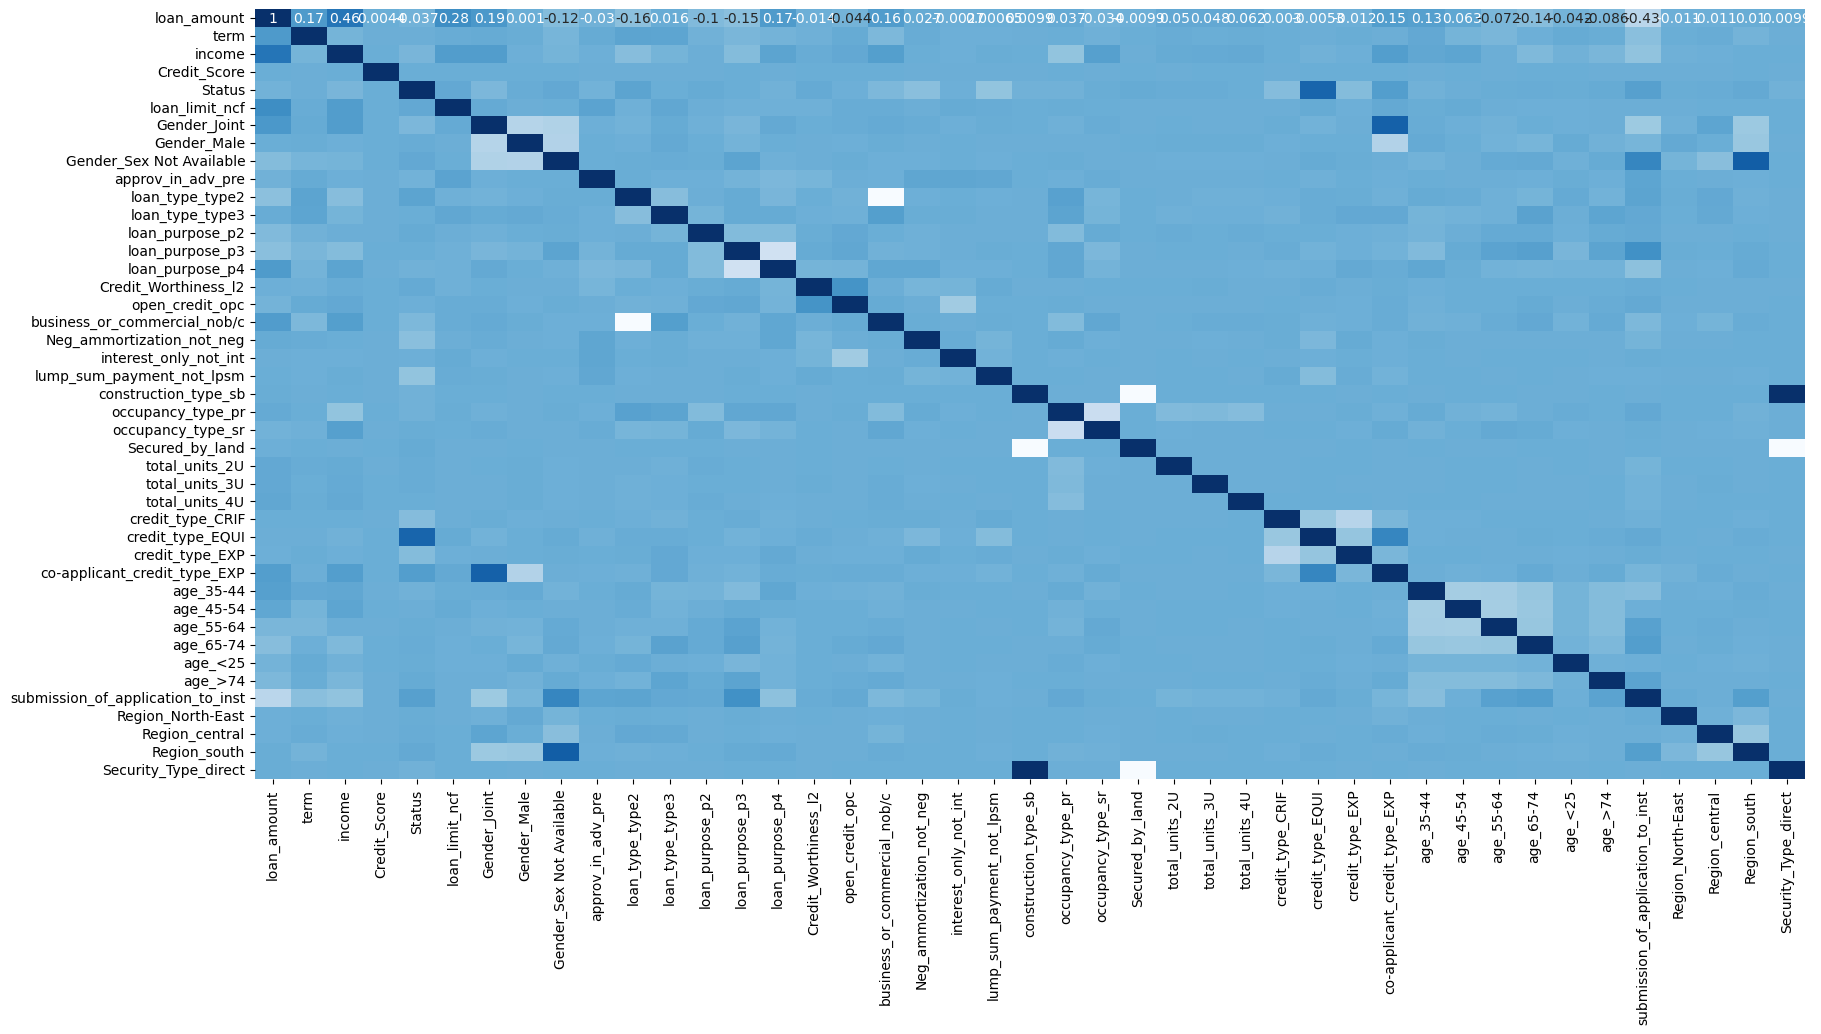

In [38]:
# Heatmap
import matplotlib.pyplot as plt 
import seaborn as sns 
plt.figure(figsize=(20,10)) 
sns.heatmap(df_modified.corr(),annot=True,cbar=False,cmap='Blues') 
df_modified.corr() 

In [39]:
# Dropping Secured_by_land as it has perfect negative correlation coefficient with security type direct
df_final=df_modified.drop(['Secured_by_land'],axis=1)
df_final.describe()

,loan_amount,term,income,Credit_Score,Status,loan_limit_ncf,Gender_Joint,Gender_Male,Gender_Sex Not Available,approv_in_adv_pre,...,age_45-54,age_55-64,age_65-74,age_<25,age_>74,submission_of_application_to_inst,Region_North-East,Region_central,Region_south,Security_Type_direct
count,1.486700e+05,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,...,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000
mean,3.311177e+05,335.136093,6970.321679,699.789103,0.246445,0.067115,0.278462,0.284832,0.253306,0.155653,...,0.234883,0.218834,0.139531,0.008993,0.048261,0.645820,0.008307,0.058499,0.430591,0.999778
std,1.839093e+05,58.403186,6345.047158,115.875857,0.430942,0.250222,0.448244,0.451336,0.434906,0.362528,...,0.423927,0.413457,0.346500,0.094405,0.214318,0.478266,0.090764,0.234685,0.495161,0.014897
min,1.650000e+04,96.000000,0.000000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.965000e+05,360.000000,3780.000000,599.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.965000e+05,360.000000,5820.000000,699.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,4.365000e+05,360.000000,8520.000000,800.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,3.576500e+06,360.000000,578580.000000,900.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
num_variables = ['loan_amount','income','Credit_Score']
df_final['Status'] = df_final['Status'].astype(int)

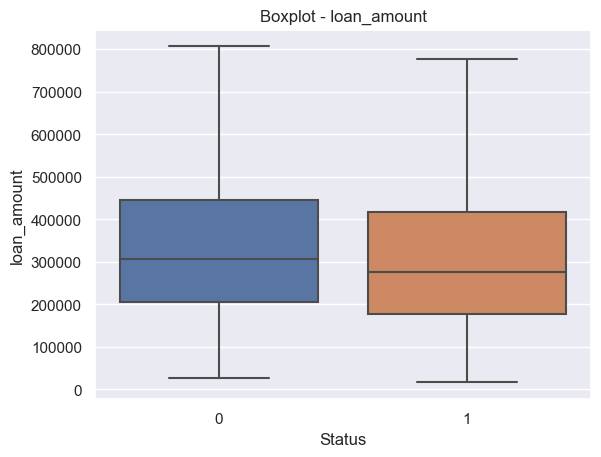

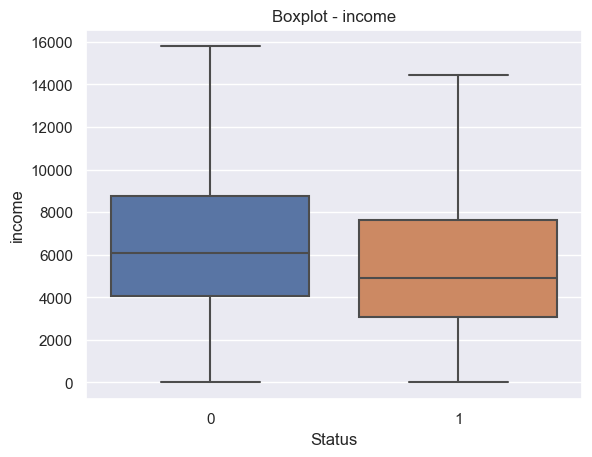

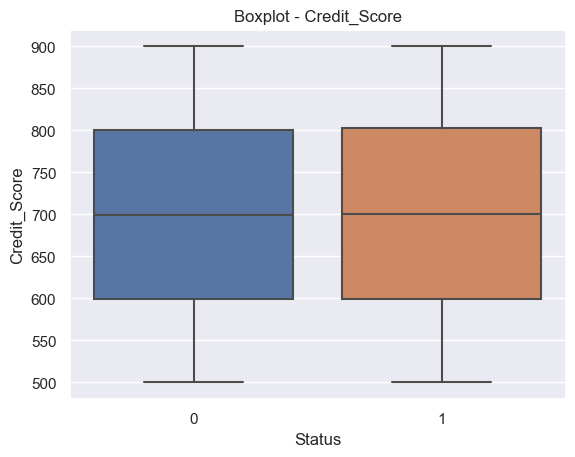

In [70]:
# Boxplots of numerical variables removing outliers
for num in num_variables:
 plt.title(f'Boxplot - {num}')
 sns.boxplot(data=df_final, x='Status',y=num,showfliers=False)
 plt.show()

In [72]:
# Bar charts
df_default = df[df.Status ==1]
df_default.head()

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
10,24900,2019,cf,Male,nopre,type2,p3,l2,nopc,b/c,...,EXP,723,CIB,55-64,to_inst,81.250000,North,direct,1,44.0
12,24902,2019,cf,Joint,nopre,type2,p3,l1,nopc,b/c,...,CRIF,884,EXP,65-74,to_inst,80.038760,North,direct,1,51.0
15,24905,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,685,CIB,45-54,not_inst,55.434783,North,direct,1,20.0


In [76]:
bar_variables = ['Gender','loan_purpose','Credit_Worthiness','age','Region','Security_Type']

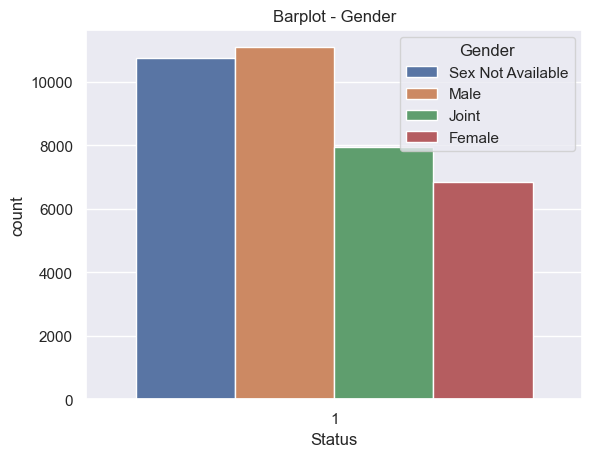

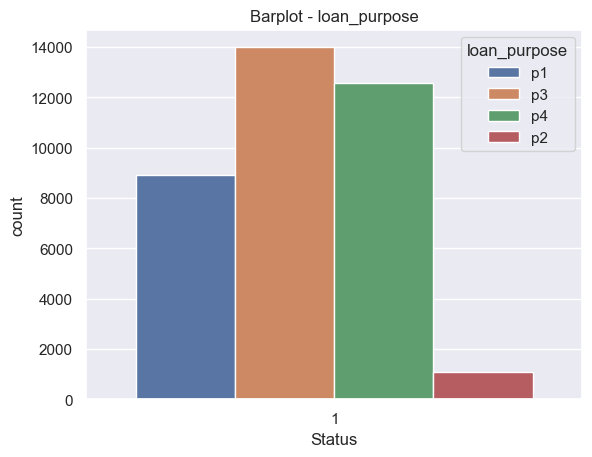

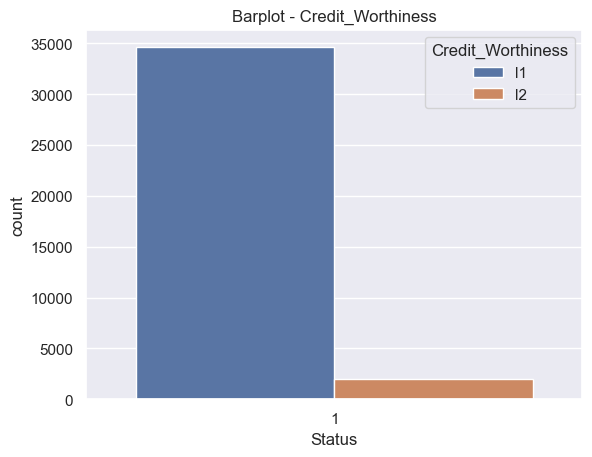

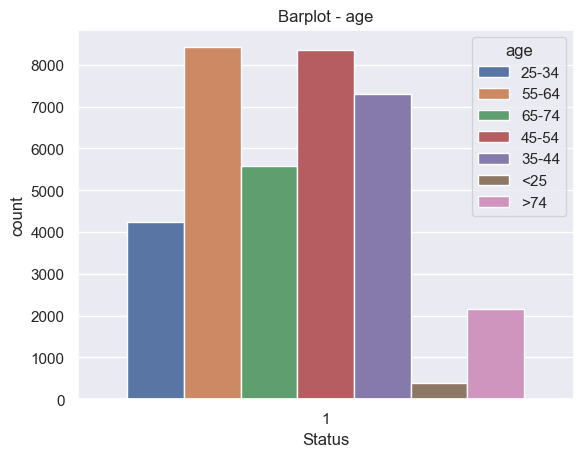

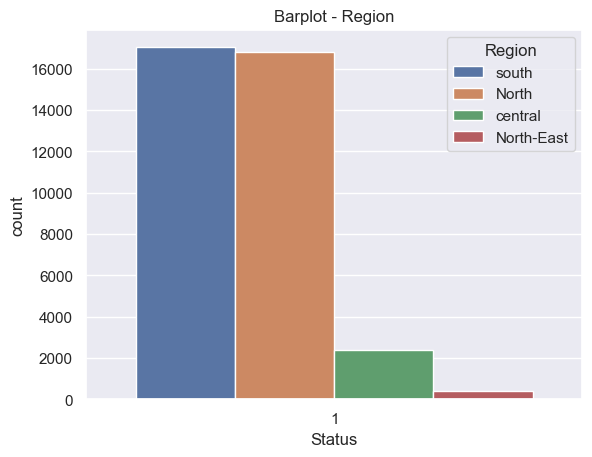

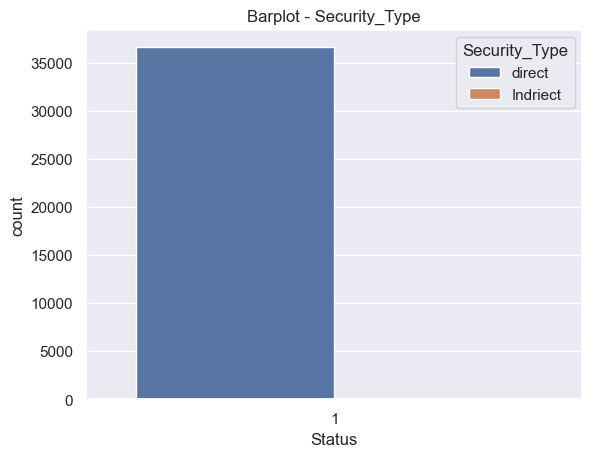

In [77]:
# Default by gender
for bar in bar_variables:
 plt.title(f'Barplot - {bar}')
 sns.countplot(x ='Status', hue = bar, data = df_default)
 plt.show()

In [78]:
# Setting target variable and dependent variables
y = df_final['Status'] 
X = df_final.drop(['Status'], axis=1) 

In [80]:
# Importing the train_test_split Function and splitting dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [111]:
# Build and fit Random Forest Classifier model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [112]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

In [113]:
#Evaluationg the model using accuracy score
y_test_pred = rf.predict(X_test)
accuracy = accuracy_score( y_test, y_test_pred)
accuracy

0.8693751261182485

In [114]:
#Accuracy on model training data
y_train_pred =rf.predict(X_train)
accuracy = accuracy_score( y_train, y_train_pred)
accuracy

1.0

In [115]:
# Confusion matrix plot
cm=confusion_matrix(y_test, y_test_pred)

In [116]:
cm

array([[22044,   354],
       [ 3530,  3806]], dtype=int64)

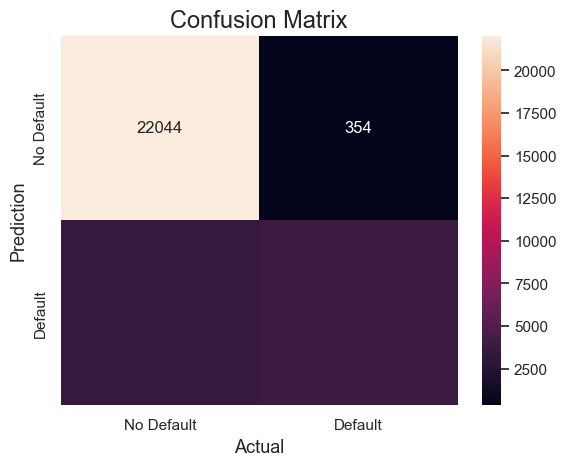

In [117]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['No Default','Default'],
            yticklabels=['No Default','Default'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [118]:
 print(classification_report(y_test, y_test_pred, labels=[0,1])) 

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     22398
           1       0.91      0.52      0.66      7336

    accuracy                           0.87     29734
   macro avg       0.89      0.75      0.79     29734
weighted avg       0.88      0.87      0.86     29734



In [119]:
# Build and fit Naive Bayesian Classifier model
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [120]:
#Evaluationg the model using accuracy score
y_test_pred = GNB.predict(X_test)
accuracy = accuracy_score( y_test, y_test_pred)
accuracy

0.749310553575032

In [121]:
#Accuracy on model training data
y_train_pred =GNB.predict(X_train)
accuracy = accuracy_score( y_train, y_train_pred)
accuracy

0.7493021456918006

In [122]:
# Confusion matrix plot
cm=confusion_matrix(y_test, y_test_pred)

In [123]:
cm

array([[22104,   294],
       [ 7160,   176]], dtype=int64)

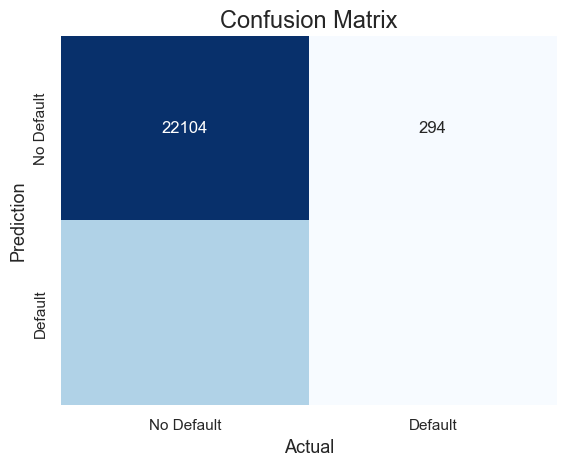

In [124]:
sns.heatmap(cm,
            annot=True,
            fmt='g',
            cmap="Blues", cbar=False,
            xticklabels=['No Default','Default'],
            yticklabels=['No Default','Default'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [125]:
 print(classification_report(y_test, y_test_pred, labels=[0,1])) 

              precision    recall  f1-score   support

           0       0.76      0.99      0.86     22398
           1       0.37      0.02      0.05      7336

    accuracy                           0.75     29734
   macro avg       0.56      0.51      0.45     29734
weighted avg       0.66      0.75      0.66     29734

